In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc 

Load and cleaning data 

In [8]:
data=pd.read_csv('CC-GENERAL.csv')
data.drop(['CUST_ID'],axis=1,inplace=True)
data.fillna(data.mean(),inplace=True)
print(data.head())

       BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 17 columns]


preprocessing the data 

In [9]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(data)
X_normalized=normalize(X_scaled)
X_normalixed=pd.DataFrame(X_normalized)

In [5]:
pca=PCA(n_components=2)
X_principal=pca.fit_transform(X_normalized)
X_principal=pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']

make the dendrograms 

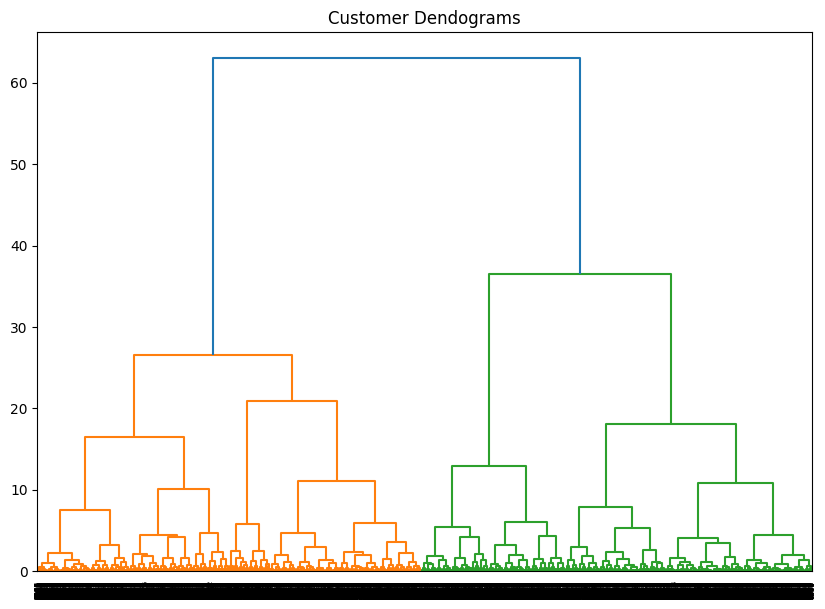

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
Dendrogram=shc.dendrogram(shc.linkage(X_principal, method='ward'))

apply aggomerative clustering for dikffernt values 

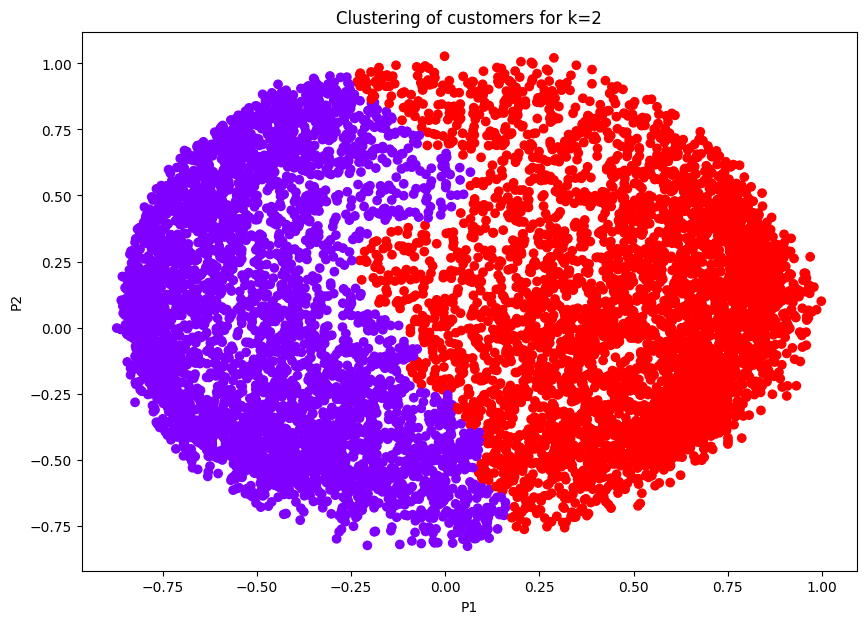

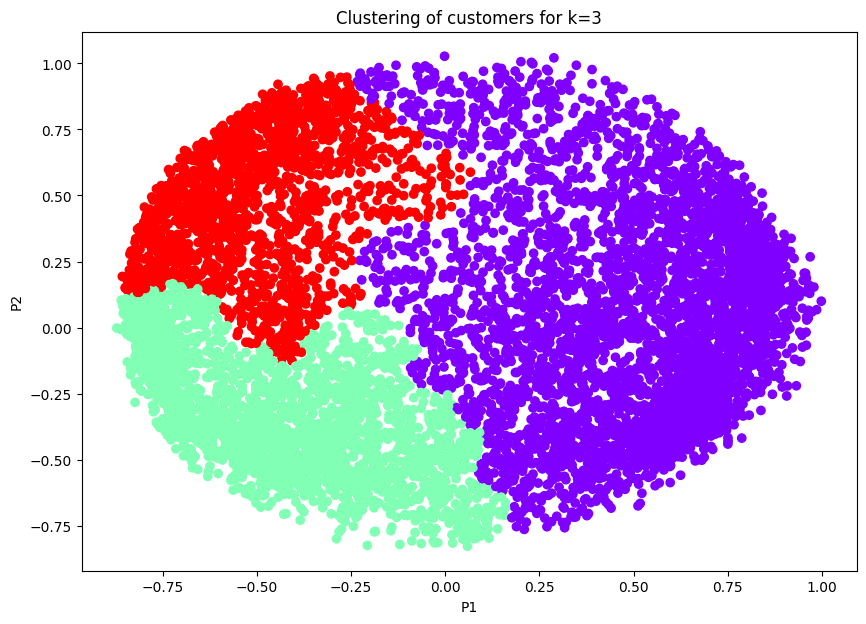

In [ ]:
for k in range(2,7):
    model=AgglomerativeClustering(n_clusters=k)
    labels=model.fit_predict(X_principal)

    plt.figure(figsize=(10, 7))
    plt.scatter(X_principal['P1'],X_principal['P2'],c=labels,cmap='rainbow')
    plt.title(f'Clustering of customers for k={k}')
    plt.xlabel('P1')
    plt.ylabel('P2')    
    plt.show()
